In [1]:
import pandas as pd
import altair as alt


In [25]:
df = pd.read_csv("your_file.csv")
df.columns = ["fish_count","time_diff","timestamps","calc_timestamps"]
df["seconds"] = df["timestamps"]/1000
df["class"] = "Herring"
display(df[df["fish_count"]>0])
alt.Chart(df,title="Processed video detected fish").mark_line().encode(
    x='seconds',
    y='fish_count',
    color='class'
).interactive()

fish_count  time_diff  timestamps  calc_timestamps  seconds    class
19           1  85.290076      1890.0      1985.038168    1.890  Herring
20           1  92.541985      1999.0      2084.290076    1.999  Herring
21           1  87.793893      2091.0      2183.541985    2.091  Herring
22           1  87.045802      2195.0      2282.793893    2.195  Herring
23           2  87.297710      2295.0      2382.045802    2.295  Herring
24           2  85.549618      2394.0      2481.297710    2.394  Herring
25           2  84.801527      2495.0      2580.549618    2.495  Herring
26           2  76.053435      2595.0      2679.801527    2.595  Herring
27           1  83.305344      2703.0      2779.053435    2.703  Herring
28           1  73.557252      2795.0      2878.305344    2.795  Herring
29           2  81.809160      2904.0      2977.557252    2.904  Herring
30           2  64.061069      2995.0      3076.809160    2.995  Herring
31           1  75.312977      3112.0      3176.061069    3.112  Herring
32           1  62.564885      3200.0      3275.312977    3.200  Herring
33           1  74.816794      3312.0      3374.564885    3.312  Herring
34           1  74.068702      3399.0      3473.816794    3.399  Herring
35           1  71.320611      3499.0      3573.068702    3.499  Herring
36           1  72.572519      3601.0      3672.320611    3.601  Herring
37           1  76.824427      3699.0      3771.572519    3.699  Herring
38           1  66.076336      3794.0      3870.824427    3.794  Herring
39           1  73.328244      3904.0      3970.076336    3.904  Herring
41           1  67.832061      4099.0      4168.580153    4.099  Herring
42           1  68.083969      4200.0      4267.832061    4.200  Herring
43           2  65.335878      4299.0      4367.083969    4.299  Herring
44           1  66.587786      4401.0      4466.335878    4.401  Herring
45           1  69.839695      4499.0      4565.587786    4.499  Herring
47           1  69.343511      4704.0      4764.091603    4.704  Herring

/Users/apowell/Documents/Projects/fish-counter-app/venv/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [9]:
display(df.timestamps.diff())
display(df.calc_timestamps.diff())

0        NaN
1       93.0
2      102.0
3      100.0
4       99.0
       ...  
124    100.0
125    100.0
126    100.0
127    100.0
128     96.0
Name: timestamps, Length: 129, dtype: float64

0            NaN
1      99.251908
2      99.251908
3      99.251908
4      99.251908
         ...    
124    99.251908
125    99.251908
126    99.251908
127    99.251908
128    99.251908
Name: calc_timestamps, Length: 129, dtype: float64

In [6]:
timestamps = df.timestamps
calc_timestamps = df.calc_timestamps
for i, (ts, cts) in enumerate(zip(timestamps, calc_timestamps)):
    print('Frame %d difference:'%i, abs(ts - cts))

Frame 0 difference: 99.25190839694656
Frame 1 difference: 105.50381679389312
Frame 2 difference: 102.75572519083971
Frame 3 difference: 102.00763358778624
Frame 4 difference: 102.25954198473278
Frame 5 difference: 99.51145038167931
Frame 6 difference: 99.76335877862584
Frame 7 difference: 104.01526717557226
Frame 8 difference: 92.26717557251891
Frame 9 difference: 102.51908396946544
Frame 10 difference: 96.77099236641197
Frame 11 difference: 94.02290076335862
Frame 12 difference: 95.27480916030527
Frame 13 difference: 99.52671755725191
Frame 14 difference: 87.77862595419856
Frame 15 difference: 97.0305343511452
Frame 16 difference: 93.28244274809208
Frame 17 difference: 90.5343511450385
Frame 18 difference: 89.78625954198469
Frame 19 difference: 95.03816793893202
Frame 20 difference: 85.29007633587844
Frame 21 difference: 92.54198473282486
Frame 22 difference: 87.79389312977173
Frame 23 difference: 87.0458015267177
Frame 24 difference: 87.29770992366412
Frame 25 difference: 85.54961832

In [5]:
import cv2

cap = cv2.VideoCapture('yolo2_out_py.mp4')
fps = cap.get(cv2.CAP_PROP_FPS)

timestamps = [cap.get(cv2.CAP_PROP_POS_MSEC)]
calc_timestamps = [0.0]

while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists:
        timestamps.append(cap.get(cv2.CAP_PROP_POS_MSEC))
        calc_timestamps.append(calc_timestamps[-1] + 1000/fps)
    else:
        break

cap.release()

for i, (ts, cts) in enumerate(zip(timestamps, calc_timestamps)):
    print('Frame %d difference:'%i, abs(ts - cts))

Frame 0 difference: 0.0
Frame 1 difference: 33.333333333333336
Frame 2 difference: 33.333333333333336
Frame 3 difference: 33.33333333333333
Frame 4 difference: 33.33333333333334
Frame 5 difference: 33.33333333333334
Frame 6 difference: 33.33333333333337
Frame 7 difference: 33.33333333333337
Frame 8 difference: 33.33333333333334
Frame 9 difference: 33.333333333333314
Frame 10 difference: 33.333333333333314
Frame 11 difference: 33.333333333333314
Frame 12 difference: 33.333333333333314
Frame 13 difference: 33.33333333333326
Frame 14 difference: 33.3333333333332
Frame 15 difference: 33.3333333333332
Frame 16 difference: 33.33333333333326
Frame 17 difference: 33.33333333333326
Frame 18 difference: 33.33333333333337
Frame 19 difference: 33.33333333333337
Frame 20 difference: 33.333333333333485
Frame 21 difference: 33.333333333333485
Frame 22 difference: 33.333333333333485
Frame 23 difference: 33.3333333333336
Frame 24 difference: 33.3333333333336
Frame 25 difference: 33.3333333333336
Frame 

## Run single image

In [1]:
def draw_pred_box(class_id, conf, left, top, right, bottom, frame, classes, count=None):
    """Draw the predicted bounding box. Used in postProcess script.

    Args:
        - class_id: Indices for each of the object classes (e.g. herring)
        - conf: confidence score for box
        - left, top, right, bottom: frame indexes for corners of box
        - frame: frame object
        - classes: different class names
        - count: current count of objects detected
    """
    import cv2 as cv
    # Draw a bounding box.
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)

    label = "%.2f" % conf
    count_label = "{}".format(count)

    # Get the label for the class name and its confidence
    if classes:
        assert class_id < len(classes)
        label = "%s:%s" % (classes[class_id], label)

    # Display the label at the top of the bounding box
    label_size, base_line = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, label_size[1])
    cv.rectangle(
        frame,
        (left, top - round(1.5 * label_size[1])),
        (left + round(1.5 * label_size[0]), top + base_line),
        (255, 255, 255),
        cv.FILLED,
    )
    cv.putText(frame, label, (left, top), cv.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 1)
    # Draw count in box
    cv.putText(
        img=frame,
        text=count_label,
        org=(right + 20, top + 50),
        fontFace=cv.FONT_HERSHEY_SIMPLEX,
        fontScale=1.75,
        color=(255, 255, 255),
        thickness=1,
    )

In [ ]:
class FishCounter(object):
    """Detect fish in either video or images.
    """
    def __init__(self,class,model_config,weights_config)
        self.class = class
        self.model_config = model_config
        self.weights_config = weights_config
    
    def 

In [ ]:
import glob
import os

import cv2

import inference_utils

#cwd = os.path.abspath(os.path.dirname(__file__))
STATIC_FOLDER = os.path.abspath(os.path.join(".", "static"))
images = glob.glob(os.path.join(STATIC_FOLDER,"test_images/*.jpg"))


## Initialize the parameters
# Confidence threshold
conf_threshold = 0.5
# Non-maximum suppression threshold (maximum bounding box)
nms_threshold = 0.05
input_width = None # Width of network's input image
input_height = None  # Height of network's input image

# Load class name
classes = "Herring"
# Give the configuration and weight files for the model and load the network using them.
modelConfiguration = "herring.cfg"
modelWeights = "herring_final.weights"
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)

for herring_image in images:


    frame = cv2.imread(herring_image)
    cv2.imshow('dst_rt', frame)
    # # Get frame from the video
    # hasFrame, frame = cap.read()

    input_width,input_height,_ = frame.shape
    input_width = input_height = min(input_width,input_height)
    #input_width = 416  # Width of network's input image
    #input_height = 416  # Height of network's input image

    print(input_height,input_width)
    # Create a 4D blob from a frame.
    blob = cv2.dnn.blobFromImage(
        frame, 1 / 255, (input_width, input_height), [0, 0, 0], 1, crop=False
    )

    # Sets the input to the network
    net.setInput(blob)

    # Runs the forward pass to get output of the output layers
    outs = net.forward(inference_utils.get_outputs_names(net=net))

    # Remove the bounding boxes with low confidence
    counts = inference_utils.postprocess(
        frame=frame,
        outs=outs,
        tracker=None,
        conf_threshold=conf_threshold,
        nms_threshold=nms_threshold,
        classes=classes,
    )
#cv2.waitKey(0)
cv2.destroyAllWindows()
print(counts)

240 240


[ERROR:0@16835.908] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1171) getLayerShapesRecursively OPENCV/DNN: [Reorg]:(reorg_27): getMemoryShapes() throws exception. inputs=1 outputs=1/1 blobs=0
[ERROR:0@16835.908] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1174) getLayerShapesRecursively     input[0] = [ 1 64 15 15 ]
[ERROR:0@16835.908] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1178) getLayerShapesRecursively     output[0] = [ 1 256 7 7 ]
[ERROR:0@16835.908] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1184) getLayerShapesRecursively Exception message: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/layers/reorg_layer.cpp:99: error: (-215:Assertion failed) total(outputs[0]) == total(inputs[0]) in function 'getMemoryShapes'



error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/layers/reorg_layer.cpp:99: error: (-215:Assertion failed) total(outputs[0]) == total(inputs[0]) in function 'getMemoryShapes'


In [16]:
blob = cv2.dnn.blobFromImage(
    frame, 1 / 255, (input_width, input_height), [0, 0, 0], 1, crop=False
)
net.setInput(blob)
outs = net.forward(inference_utils.get_outputs_names(net=net))


[ERROR:0@1884.928] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1171) getLayerShapesRecursively OPENCV/DNN: [Reorg]:(reorg_27): getMemoryShapes() throws exception. inputs=1 outputs=1/1 blobs=0
[ERROR:0@1884.928] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1174) getLayerShapesRecursively     input[0] = [ 1 64 15 15 ]
[ERROR:0@1884.928] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1178) getLayerShapesRecursively     output[0] = [ 1 256 7 7 ]
[ERROR:0@1884.928] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/net_impl.cpp (1184) getLayerShapesRecursively Exception message: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/layers/reorg_layer.cpp:99: error: (-215:Assertion failed) total(outputs[0]) == total(inputs[0]) in function 'getMemoryShapes'



error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/dnn/src/layers/reorg_layer.cpp:99: error: (-215:Assertion failed) total(outputs[0]) == total(inputs[0]) in function 'getMemoryShapes'


### Test Inference

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [97]:
image = cv2.imread('/Users/aus10powell/Downloads/1_2016-04-21_21-50-1809218.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

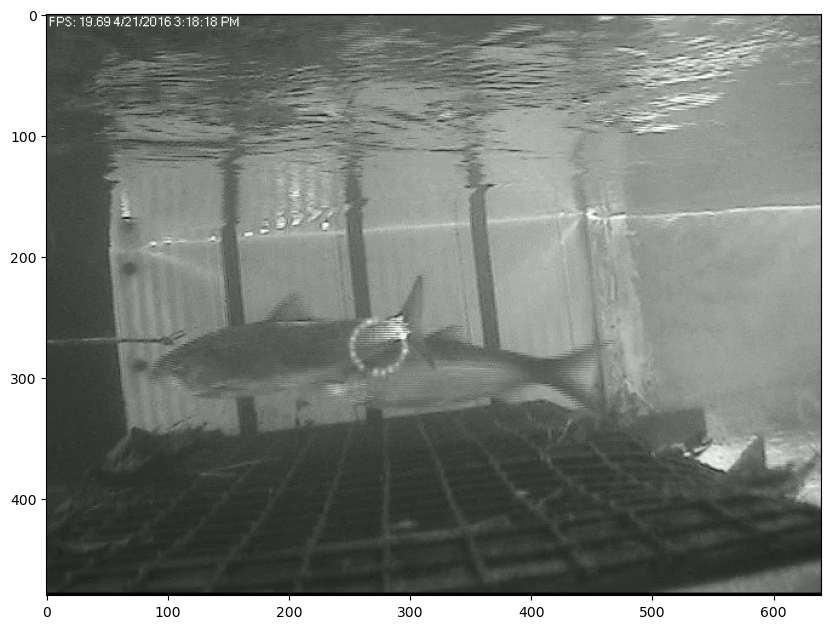

In [98]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [99]:
#import sys
#sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "/Users/aus10powell/Downloads/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
#sam.to(device=device)

predictor = SamPredictor(sam)

In [100]:
predictor.set_image(image)

In [101]:
input_point = np.array([[500, 375]])
input_label = np.array([1])

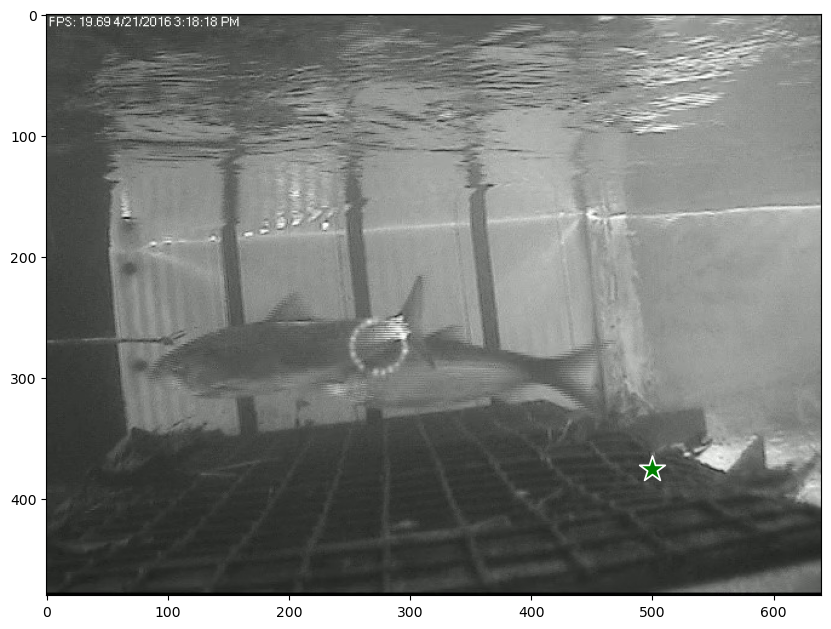

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [103]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [104]:
masks.shape  # (number_of_masks) x H x W

(3, 480, 640)

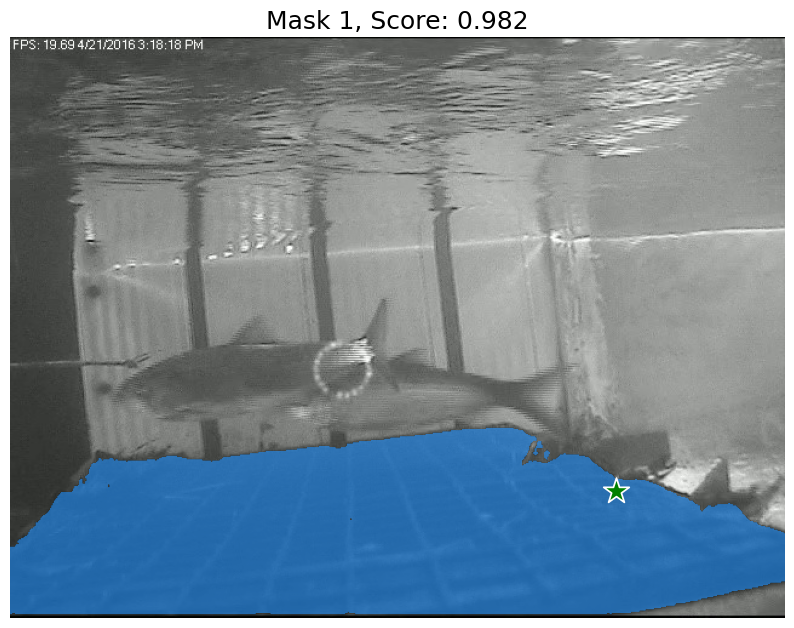

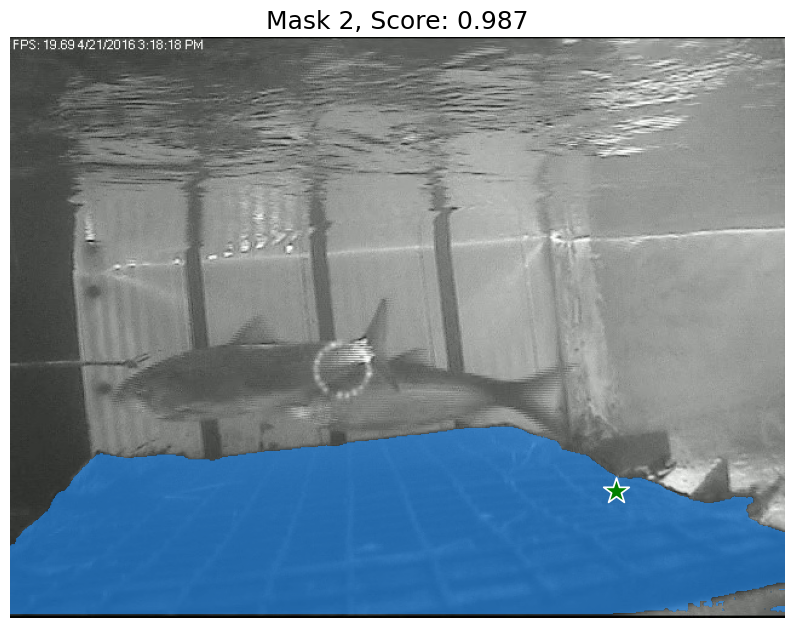

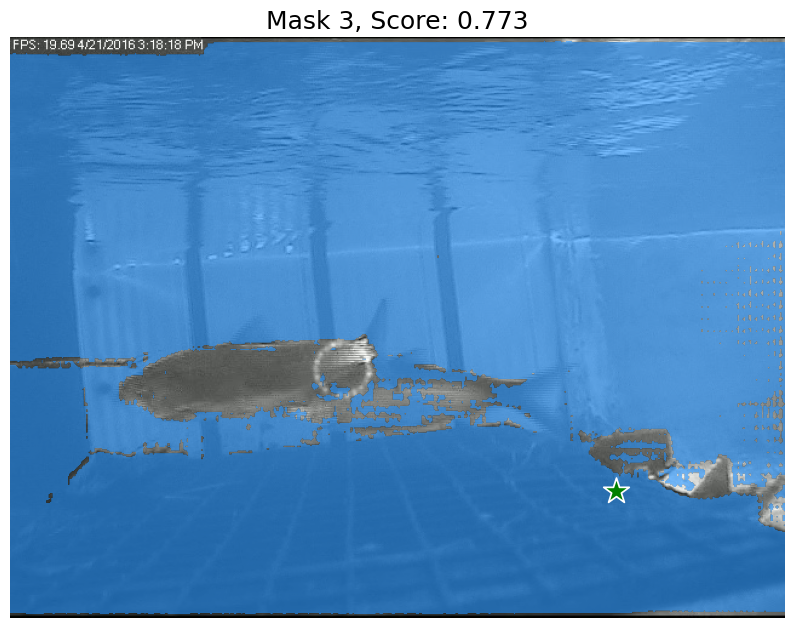

In [105]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [106]:
input_point = np.array([[500, 375],[325, 265]])
input_label = np.array([1, 1])

mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

In [107]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

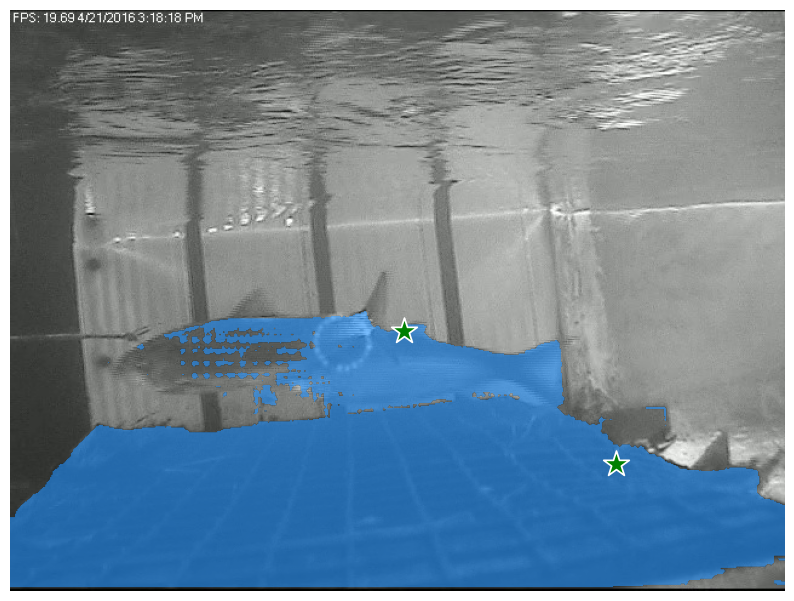

In [108]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show() 

In [109]:
input_point = np.array([[500, 375], [325, 265]])
input_label = np.array([1, 0])

mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

In [110]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

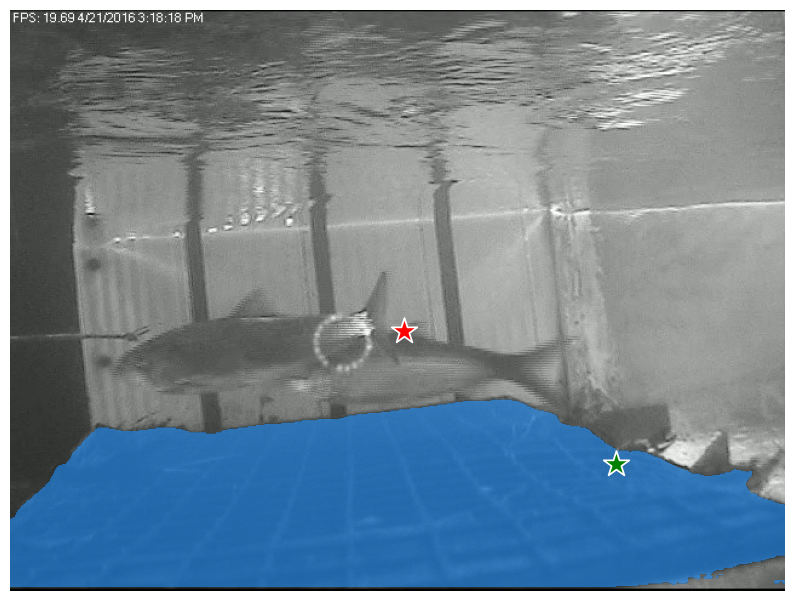

In [111]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show() 

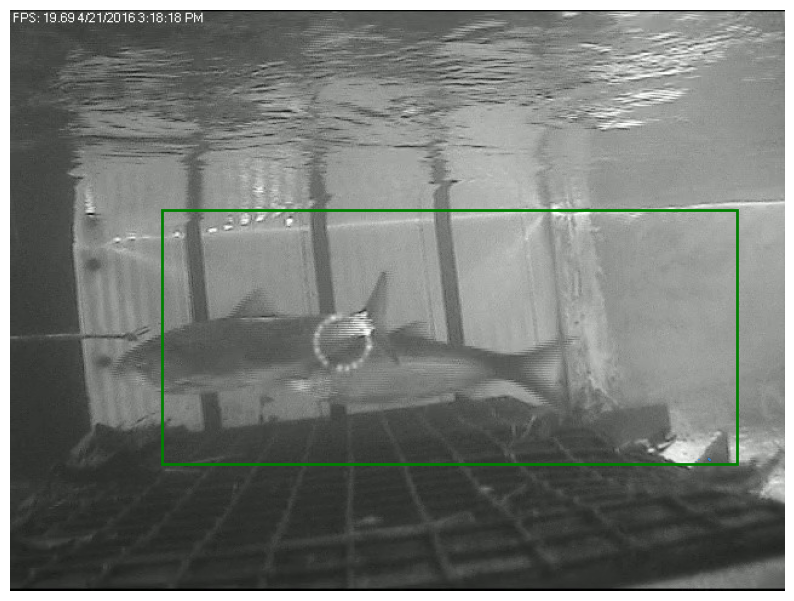

In [112]:
input_point = np.array([[500, 375], [325, 265]])
input_label = np.array([1, 0])
input_box = np.array([600, 375,125, 165])
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    box=input_box[None, :],
    multimask_output=False,
)
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [113]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

In [114]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

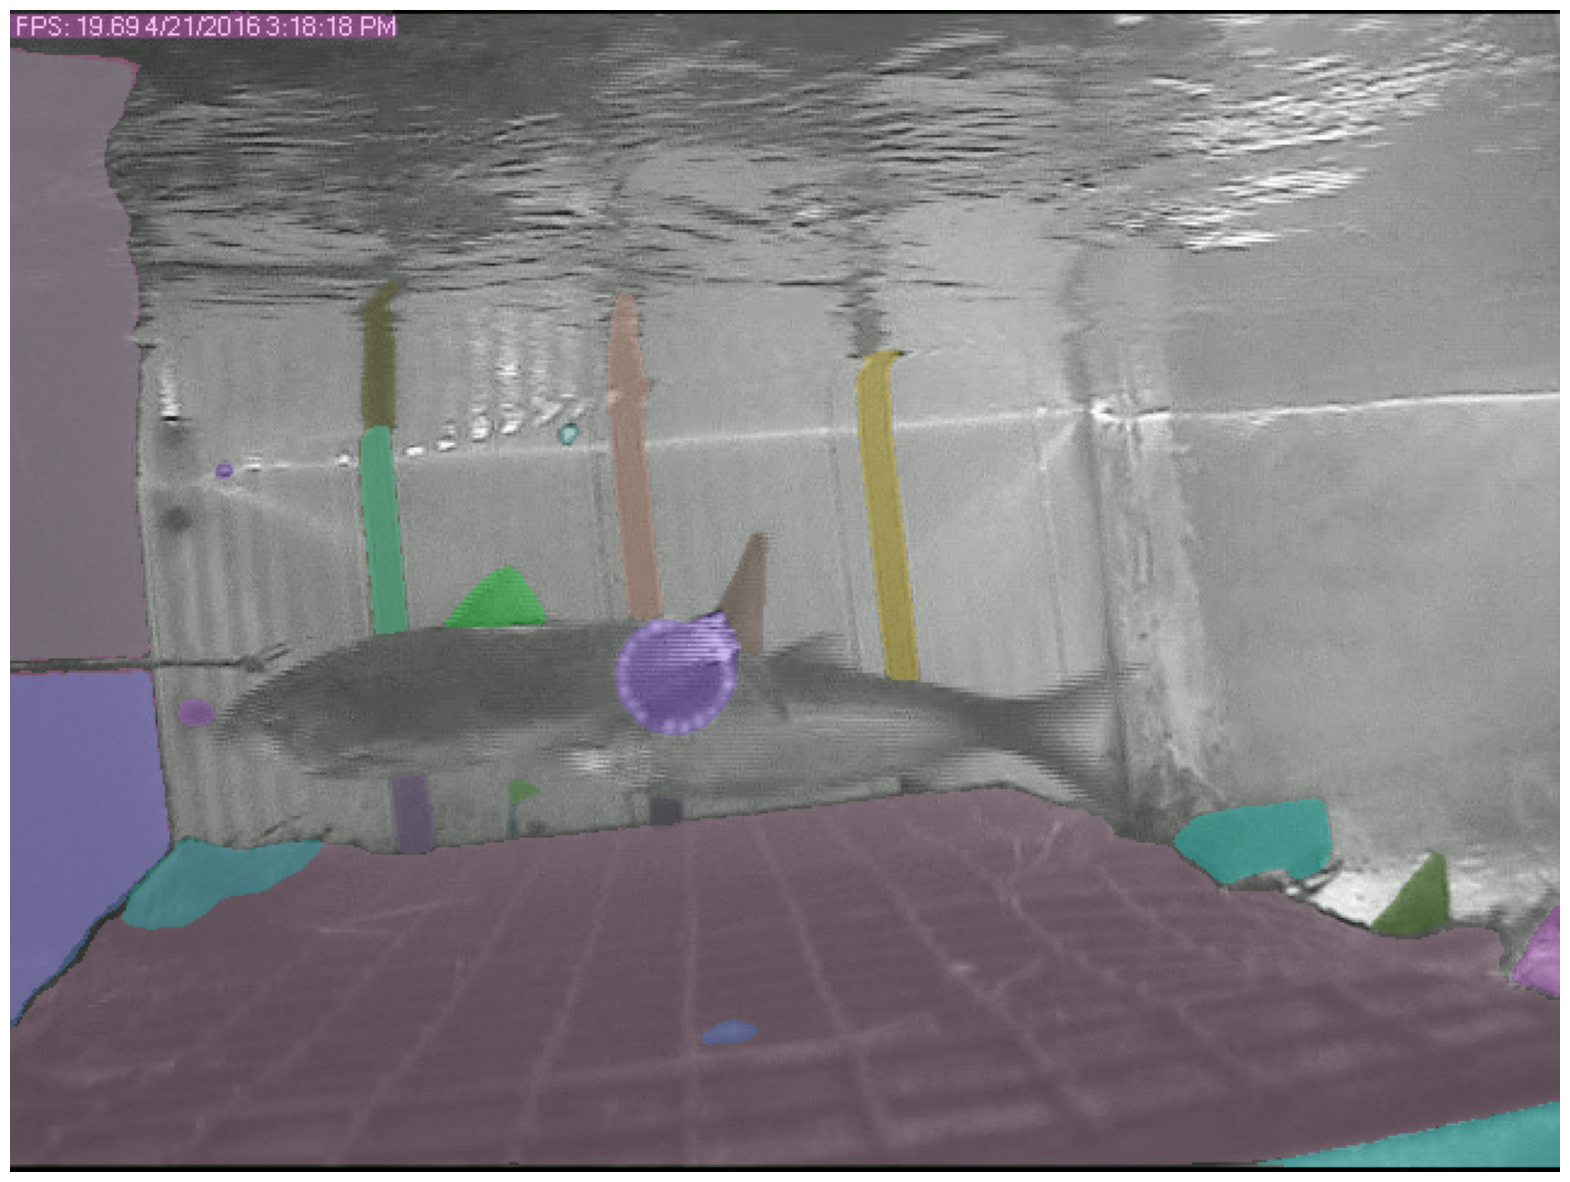

In [115]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [81]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(image)


In [82]:
len(masks2)

46

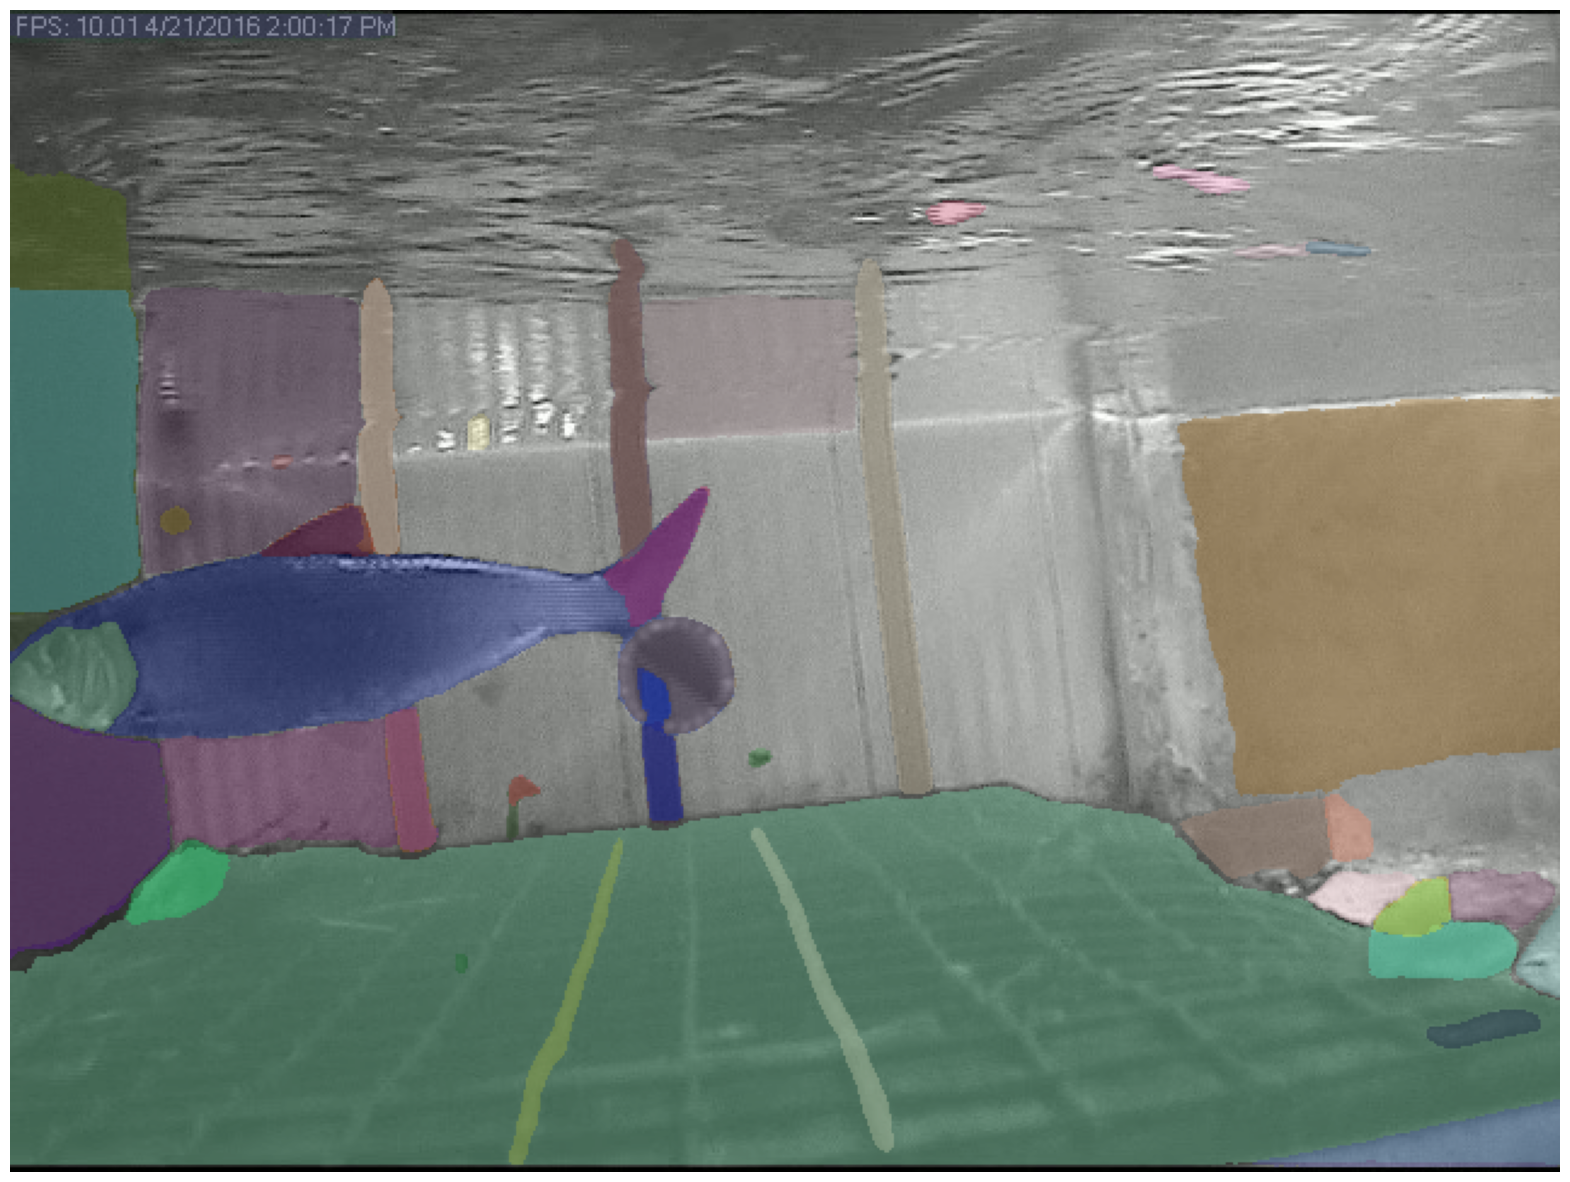

In [83]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 